# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '230426'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
library(data.table)
library(arrow)

In [4]:
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character"))
endpoints = sort(endpoints_md$endpoint)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [6]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401", #Hypertension"
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    
    "phecode_059-1", # COVID 19
    
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    
    #"phecode_374-3", # Retinal vascular changes and occlusions
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    #"phecode_388" # Blindness and low vision 
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease
    "phecode_542", # Chronic liver disease and sequelae
    "OMOP_4306655" # All-Cause Death
    
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
    
    #"phecode_460-2",	#Acute lower respiratory infection
    #"phecode_665", # Psoriasis
    #"phecode_121", # Leukemia
    #"phecode_705-1", # Rheumatoid arthritis

)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [7]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"COPD",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
               phecode_string == "Malignant neoplasm of the thoracic and respiratory organs"~"Thoracic and respiratory cancer",
               phecode_string == "Malignant neoplasm of the digestive organs"~"GI cancer",
               phecode_string == "Malignant neoplasm of the skin"~"Skin cancer",
               phecode_string == "Dementias and cerebral degeneration"~"Dementias",
               phecode_string == "Chronic liver disease and sequelae"~"Chronic liver disease",
               
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [8]:
endpoints_md %>% filter(endpoint %in% endpoint_selection) %>% as_tibble() %>% arrange(n)  %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>% mutate(perc = freq*100)

V1,endpoint,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,perc
<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
285,Parkinson's disease,61159,481,0.007864746,324.11,Parkinson's disease (Primary),Neuro,Both,0,324,1,0.7864746
49,Thoracic and respiratory cancer,61165,686,0.011215564,102,Malignant neoplasm of the thoracic and respiratory organs,Neoplasms,Both,0,102,0,1.1215564
297,Dementias,61233,968,0.015808469,328,Dementias and cerebral degeneration,Neuro,Both,0,328,0,1.5808469
22,COVID-19*,61256,1017,0.016602455,059.1,COVID-19*,ID,Both,1,59,1,1.6602455
568,Ischemic stroke,60849,1157,0.019014281,431.11,Cerebral infarction [Ischemic stroke],Cardio,Both,0,431,1,1.9014281
41,GI cancer,60713,1652,0.027209988,101,Malignant neoplasm of the digestive organs,Neoplasms,Both,0,101,0,2.7209988
430,Glaucoma,60486,1664,0.027510498,375.1,Glaucoma,Eye,Both,0,375,0,2.7510498
421,Diabetic retinopathy,60400,1760,0.029139073,374.42,Diabetic retinopathy,Eye,Both,0,374,1,2.9139073
505,Myocardial infarction,60213,1800,0.029893877,404.1,Myocardial infarction [Heart attack],Cardio,Both,0,404,0,2.9893877


In [9]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '230426'

In [10]:
eligable_eids = arrow::read_feather(glue("{output_path}/eligable_eids_long_{today}.feather")) %>% 
    mutate(included = 1)
eligable_eids$eid = as.numeric(levels(eligable_eids$eid))[eligable_eids$eid]

Warning message:
“Coercing dictionary values to R character factor levels”


In [11]:
data_outcomes = arrow::read_feather(glue("{output_path}/baseline_outcomes_long_220627.feather", as_data_frame=FALSE)) 

In [12]:
#partitions = 0:21
partitions = c(4, 5, 7, 9, 10, 20) # Partitions with eye test centers
crop_ratio = "0.66" # 0.3, 0.5, 0.8
partitions
paths = c()
for (p in partitions){
    temp_path = glue("/sc-projects/sc-proj-ukb-cvd/results/projects/22_retina_phewas/data/{today}/loghs/ImageTraining_[]_ConvNeXt_MLPHead_predictions/{p}/test.feather")
    #temp_path = glue("{experiment_path}/loghs/ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio{crop_ratio}/{p}/test.feather")
    paths = c(paths, temp_path)
    }

[1]  4  5  7  9 10 20

In [13]:
read_predictions = function(paths, endpoint_list){
    predictions = paths %>% map_df(
        ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_list)))) %>% 
        pivot_longer(all_of(endpoint_list), names_to="endpoint", values_to="logh") %>%
        mutate(eid = as.integer(as.character(eid))) %>%
        #mutate(eid = as.character(eid)) %>%
        select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
    return(predictions)
    }

map <- c(`1` = 'top10',
            `2` = 'rest',
         `3` = 'rest',
         `4` = 'rest',
         `5` = 'rest',
         `6` = 'rest',
         `7` = 'rest',
         `8` = 'rest',
         `9` = 'rest',
         `10` = 'rest')

calc_ratios = function(pred_outcomes, endpoints_md){
    
    logh_inc = pred_outcomes %>% 
        filter(included==1) %>% 
        group_by(endpoint) %>% 
        mutate(logh_perc = ntile(logh, 10)) %>% 
#         mutate(logh_perc=case_when(logh_perc %in% 1:9 ~ 1, 
#                                     logh_perc %in% 10:11 ~ 10,
#                                     TRUE ~ "NA")) %>%
        ungroup()

    logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event, na.rm=TRUE), event_rate = mean(event)) #%>% as_tibble()
    temp_ordered = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoint_defs$endpoint)) 
    temp_ratios = temp_ordered %>% #filter(logh_perc %in% c(1, 10)) %>% 
        pivot_wider(names_from=logh_perc, values_from=c(n, event_rate)) %>% 
        mutate(event_rate_ratio=event_rate_10/event_rate_1) %>%
#             mutate(ratio=ratio_top10/ratio_rest) %>%

        #mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>%
        #select(endpoint, n_1, n_10, event_rate_1, ratio_10, ratio) %>%
#             select(endpoint, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

        arrange(event_rate_ratio) #%>% as_tibble()
    return(temp_ratios)
    }

In [14]:
prepare_ratios = function(endpoint_list){
    
    temp_outcomes = data_outcomes %>% filter(endpoint %in% endpoint_list)
    temp_eligability = eligable_eids %>% filter(endpoint %in% endpoint_list)
    temp_outcomes_eligability = temp_outcomes %>% left_join(temp_eligability, by=c("eid", "endpoint"))
    #pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, on=c(eid, endpoint)) %>% as_tibble()
    pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, by=c("eid", "endpoint")) %>% as_tibble()
    temp_df = calc_ratios(pred_outcomes, endpoints_md)
    
    return(temp_df)
    }

In [15]:
ep_chunks = split(endpoints_md$endpoint, ceiling(seq_along(endpoints_md$endpoint)/500))

In [16]:
ratio_dfs = c()
for (i in 1:length(ep_chunks)){
    endpoint_list = ep_chunks[[i]]
    ratio_dfs[[i]] = prepare_ratios(endpoint_list)
    print(ratio_dfs[[i]])
    flush.console()
}

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



# A tibble: 500 × 22
# Groups:   endpoint [500]
   endpoint         n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>          <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1 phecode_308-4     58    37    27    12     9    10     8     6     5     4
 2 phecode_367-21    14    10     9    14    10    11     9    10     9     5
 3 phecode_391-21    14    29    18    24    21    25    15    20    13     5
 4 phecode_204-4     23     8     4     9     6    10    12     8    17    11
 5 phecode_179-9     20     7     8    10     8    16    15    11     9    11
 6 phecode_215       12     9    18    10    21     6     9     9     2     7
 7 phecode_292       18    15    18     6     9    17     7     6    19    11
 8 phecode_391-12    39    33    36    32    25    28    39    31    34    24
 9 phecode_139-52    17     7    11    12    18     6    12    10    13    11
10 phecode_144-3     16    10    24    16    13    19    17    10    21    12
# … with 490 mor

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



# A tibble: 500 × 22
# Groups:   endpoint [500]
   endpoint         n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>          <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1 phecode_685-4     14    18     9    25     8    12    17    13    15     7
 2 phecode_660-2     58    66    61    48    66    43    44    39    47    36
 3 phecode_526-11    27    17    16    13    18    16    24    17    19    17
 4 phecode_660-11    39    32    45    52    48    67    60    63    68    25
 5 phecode_660-21    53    51    49    55    45    44    36    27    40    34
 6 phecode_604-3     24    16    17    19    24    14    14    22    25    16
 7 phecode_614-54    16    12    13     9     9    12     8     6     8    11
 8 phecode_469      251   264   271   274   216   174   142   138   154   173
 9 phecode_604      126   110    92    92   114    81   104   118    94    89
10 phecode_604-1     23    20    14    12    19    23    18    14    22    18
# … with 490 mor

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



# A tibble: 170 × 22
# Groups:   endpoint [170]
   endpoint         n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>          <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1 phecode_705-5     37    20    26    17    11    10     7     5     7    11
 2 phecode_832-5    157   167   107    51    59    69    63    73    69    74
 3 phecode_730       48    60    64    57    50    37    41    36    30    31
 4 phecode_823-2    258   322   335   295   298   292   290   231   162   172
 5 phecode_823      266   332   320   329   285   274   294   240   164   186
 6 phecode_709-11    11    11    22    26    20    15    14    15    12     8
 7 phecode_719-11    12    14    19    16    13    14    18    12    15     9
 8 phecode_709-1     17    28    20    23    29    20    28    21    20    13
 9 phecode_721-4     14    16    16    17    19    15     9    16     6    12
10 phecode_712-6     17    19    24    17    24    17    15    22    21    15
# … with 160 mor

In [17]:
ratio_df_complete = bind_rows(ratio_dfs) %>% ungroup() %>%
    mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>% 
    #select(endpoint, endpoint_string, n_1, n_10, ratio_1, ratio_10, ratio) %>%
#     select(endpoint, endpoint_string, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

    arrange(event_rate_ratio) %>% left_join(endpoints_md %>% select(endpoint, n, phecode_category) %>% as_tibble(), by="endpoint")

ratio_df_complete

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,⋯,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,n,phecode_category
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>
phecode_308-4,58,37,27,12,9,10,8,6,5,⋯,0.0014705882,0.001633987,0.001307190,0.0009805524,0.0008171270,0.0006537016,0.06897679,Demoralization and apathy,176,Mental
phecode_705-5,37,20,26,17,11,10,7,5,7,⋯,0.0017997382,0.001636126,0.001145475,0.0008181967,0.0011454754,0.0018000327,0.29734595,"Rheumatism, unspecified",151,Musc/Skel
phecode_367-21,14,10,9,14,10,11,9,10,9,⋯,0.0016363934,0.001800033,0.001472754,0.0016363934,0.0014727541,0.0008181967,0.35720130,Corneal ulcer,101,Eye
phecode_391-21,14,29,18,24,21,25,15,20,13,⋯,0.0034471438,0.004103743,0.002462246,0.0032829941,0.0021342965,0.0008208833,0.35720149,Eustachian salpingitis,184,Hearing
phecode_832-5,157,167,107,51,59,69,63,73,69,⋯,0.0096657929,0.011305915,0.010322792,0.0119613305,0.0113059151,0.0121251843,0.47141481,Acetonuria,889,Signs/Symptoms
phecode_204-4,23,8,4,9,6,10,12,8,17,⋯,0.0009805524,0.001634254,0.001961105,0.0013074032,0.0027782317,0.0017976794,0.47833903,Prediabetes*,108,Endo
phecode_685-4,14,18,9,25,8,12,17,13,15,⋯,0.0013099722,0.001964958,0.002783691,0.0021287048,0.0024561978,0.0011462256,0.50008187,Prickly heat and miliaria,138,Derm
phecode_179-9,20,7,8,10,8,16,15,11,9,⋯,0.0013074032,0.002614806,0.002451381,0.0017979732,0.0014710690,0.0017979732,0.55008990,Immunodeficiency NOS,115,Blood
phecode_215,12,9,18,10,21,6,9,9,2,⋯,0.0075214900,0.002148997,0.003223496,0.0032234957,0.0007163324,0.0025071633,0.58354226,Testicular dysfunction,103,Endo


In [18]:
options(pillar.print_max = Inf)
ratio_df_complete %>% 
    arrange(event_rate_ratio) %>% 
    #write_csv(glue("outputs/SupplTable1_RateRatiosAll_10vsRest_CropRatio-0.66.csv"))
    write_csv(glue("outputs/UKB_EventRates_PhenomeWide.csv"))

In [19]:
# 0.66:
for (t in c(1, 2, 3, 5, 10, 50)){
     n = nrow(ratio_df_complete %>% filter(event_rate_ratio > t))
     freq = round(n*100/nrow(ratio_df_complete))
     print(glue("nrows with rate ratio > {t}: {n} ({freq}%)"))
}

nrows with rate ratio > 1: 1115 (95%)
nrows with rate ratio > 2: 742 (63%)
nrows with rate ratio > 3: 530 (45%)
nrows with rate ratio > 5: 321 (27%)
nrows with rate ratio > 10: 160 (14%)
nrows with rate ratio > 50: 23 (2%)


In [20]:
ratio_df_complete %>% 
    select(endpoint, endpoint_string, n, phecode_category, event_rate_ratio)%>% filter(n>50) %>% arrange(event_rate_ratio)
#%>% filter(event_rate_ratio <= 1.5) 

endpoint,endpoint_string,n,phecode_category,event_rate_ratio
<chr>,<fct>,<int>,<chr>,<dbl>
phecode_308-4,Demoralization and apathy,176,Mental,0.06897679
phecode_705-5,"Rheumatism, unspecified",151,Musc/Skel,0.29734595
phecode_367-21,Corneal ulcer,101,Eye,0.35720130
phecode_391-21,Eustachian salpingitis,184,Hearing,0.35720149
phecode_832-5,Acetonuria,889,Signs/Symptoms,0.47141481
phecode_204-4,Prediabetes*,108,Endo,0.47833903
phecode_685-4,Prickly heat and miliaria,138,Derm,0.50008187
phecode_179-9,Immunodeficiency NOS,115,Blood,0.55008990
phecode_215,Testicular dysfunction,103,Endo,0.58354226


In [21]:
#ratio_df_complete %>% filter(ratio<10) %>% arrange(desc(ratio_1)) #%>% filter(!str_detect(endpoint, "-"))

In [22]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

## Nice overview over all categories

### crop ratio 0.3

### crop ratio 0.5 with only positive ratios (negative set to 0)

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”


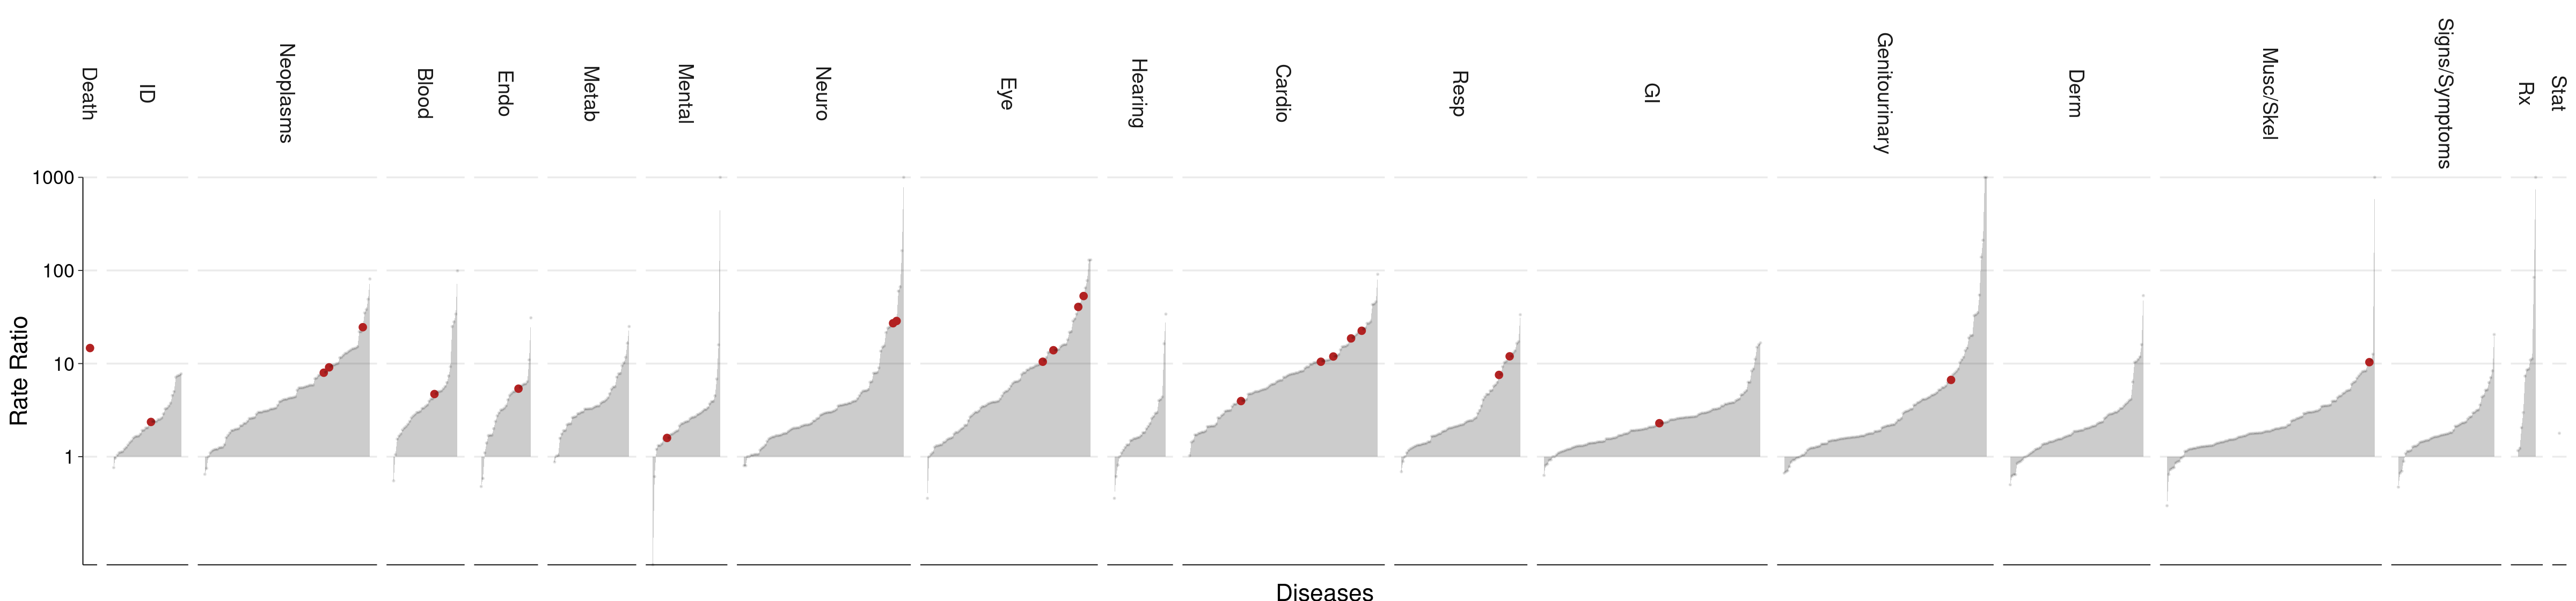

In [23]:
#plot_width = 10; plot_height=2.5; plot_res = 320
#plot_width = 30; plot_height=4; plot_res = 320
plot_width = 15; plot_height=3.5; plot_res = 320

options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp_pos = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp_pos %>% arrange(event_rate_ratio))$endpoint

#index <- temp_pos$ratio < 0
#temp_pos$ratio[index] <- 0.


temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

#index <- temp_pos$log_ratio < 0
#temp_pos$log_ratio[index] <- 0.

overview = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    #geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, log(1000)), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    #scale_x_discrete(expand=expansion(add=2))+
    scale_x_discrete(expand=expansion(add=4))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid(~phecode_category, scales = "free_x") + 
    theme(
        #axis.title.x=element_blank(),
        axis.title.x = element_text(vjust=-2, hjust=.5),
        #axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") +
    labs(x='Diseases')
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [24]:
plot_name = "Figure_2a_UKB_EventRates_PhenomeWide"
overview %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
overview %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/UKB_Figure2a.csv"))